<a href="https://colab.research.google.com/github/PratikPawar1401/Demo-CNN-for-FasionMNIST/blob/main/CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Pytorch
import torch
from torch import nn
#Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
#For Visualizatons
import matplotlib.pyplot as plt



In [2]:
# Downloading the Data
train_dataset = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data", # Stored in Data file
    train = False,
    download=True,
    transform=ToTensor(), # To transform images to numbers(tensors)
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:00<00:00, 49368357.15it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5168672.81it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 11381587.65it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 26077629.22it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_dataset)

60000

In [4]:
len(test_data)

10000

In [5]:
image , label = train_dataset[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
classes = train_dataset.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_index  = train_dataset.class_to_idx
class_index
# This will give us the index of the classes

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Check the shape
print(f"Shape of Image  {image.shape} -> [Colour Channels,Height,Width]")
print(f"Image Label: {classes[label]}")

Shape of Image  torch.Size([1, 28, 28]) -> [Colour Channels,Height,Width]
Image Label: Ankle boot


## *Creating Visualizations*

Text(0.5, 1.0, 'Ankle BOOT : 9')

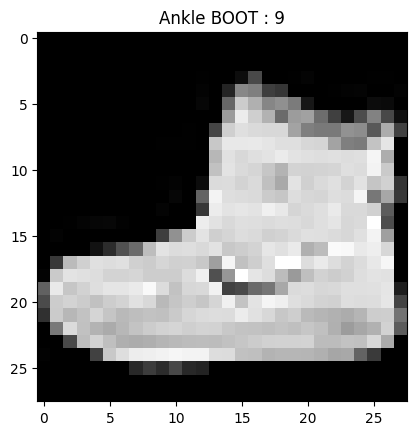

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Ankle BOOT : 9")
# An image of the data at 0 index which is an ankle boot

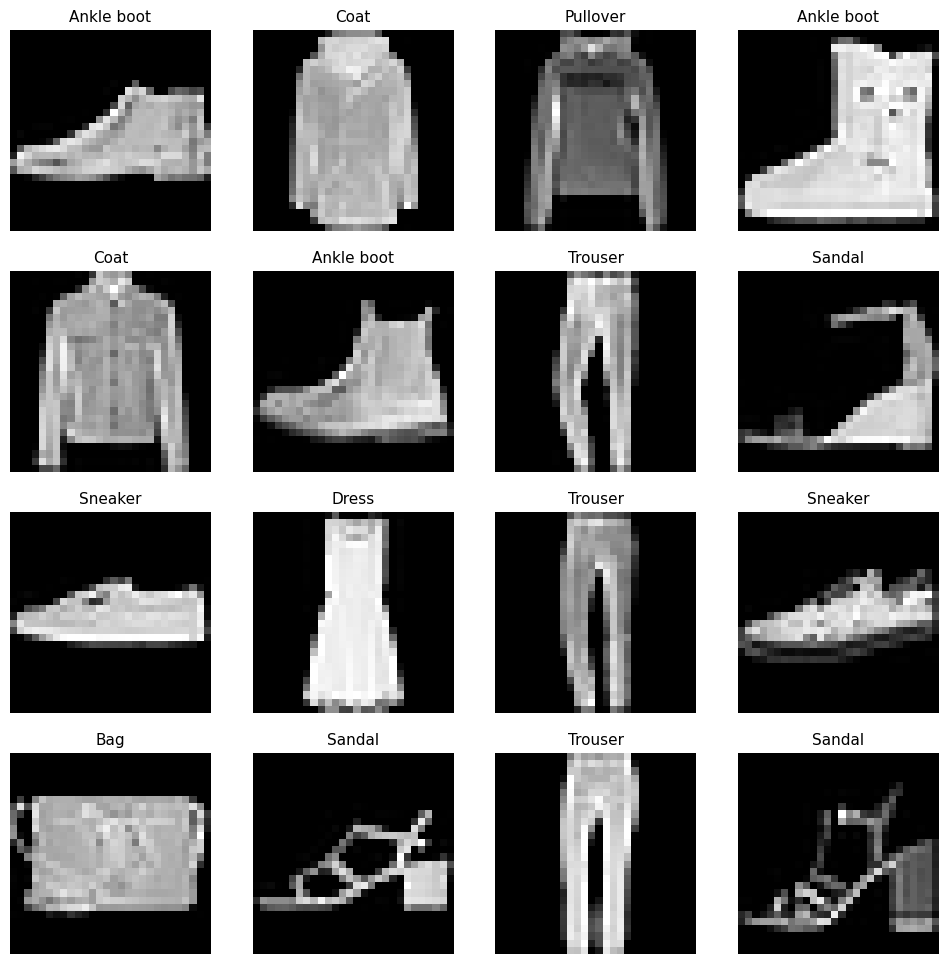

In [10]:
# Exploring the dataset bby plotting images at random indices
torch.manual_seed(64)
figure = plt.figure(figsize=(12,12))
rows , cols = 4 , 4
for i in range(1,rows*cols+1):
  rand = torch.randint(0,len(train_dataset), size=[1]).item()
  img , label = train_dataset[rand]
  figure.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(classes[label] , size = 11)
  plt.axis(False)

**Making A DataLoader**


In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE ,
                              shuffle = True)
test_dataloader = DataLoader(dataset= test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78b0664e5270>,
 <torch.utils.data.dataloader.DataLoader at 0x78b12f7de470>)

In [12]:
print(f"DataLoader : {train_dataloader,test_dataloader}")
print(f"Length of train Dataloader : {len(train_dataloader)  } with batches of {BATCH_SIZE}")
print(f"Length of test Dataloader : {len(test_dataloader)  } with batches of {BATCH_SIZE}")


DataLoader : (<torch.utils.data.dataloader.DataLoader object at 0x78b0664e5270>, <torch.utils.data.dataloader.DataLoader object at 0x78b12f7de470>)
Length of train Dataloader : 1875 with batches of 32
Length of test Dataloader : 313 with batches of 32


In [13]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label : 3 , label size: torch.Size([])


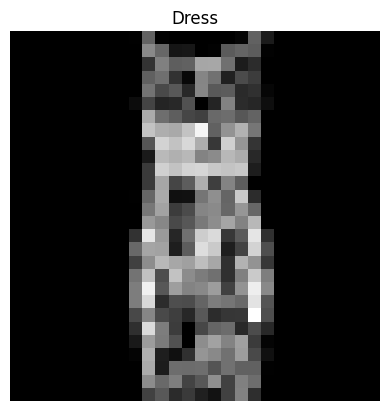

In [14]:
torch.manual_seed(64)
random_index = torch.randint(0,len(train_features_batch),size = [1]).item()
img , label = train_features_batch[random_index],train_labels_batch[random_index]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(classes[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label : {label} , label size: {label.shape}")

#Preparing the Baseline Model

In [15]:
# Creating a Flatten Layer
flatten_model = nn.Flatten()

# Taking one sample from the batch
x = train_features_batch[0]
#Putting it through flatten layer
y = flatten_model(x)

print(f"Shape before passing through flatten layer: {x.shape}")
print(f"Shape after passing through flatten layer : {y.shape}")


Shape before passing through flatten layer: torch.Size([1, 28, 28])
Shape after passing through flatten layer : torch.Size([1, 784])


In [16]:
from torch import nn
class fashionMNISTmodel(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)




In [17]:
torch.manual_seed(64)
model_1 = fashionMNISTmodel(
    input_shape = 784,
    hidden_units = 100,
    output_shape = len(classes)
)

In [18]:
model_1

fashionMNISTmodel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [19]:
# Passing a dummy through our model
dummy = torch.randn([1,1,28,28])
model_1(dummy)

tensor([[ 0.8656,  0.2908,  0.5459, -0.0078,  0.3341, -0.0596,  0.4750, -0.3408,
         -0.1553,  0.0766]], grad_fn=<AddmmBackward0>)

### Creating a loss function and optimizer .
* For this problem , `nn.CrossEntropyLoss` is the most suitable loss function as we are dealing with a multi-class data
* We'll be using `torch.optim.SGD` as our optimizer
* Also for evaluation metrics, we'll be calculationg the `accuracy`


In [20]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

In [21]:
# Importing accuracy function frmo helper functions
from helper_functions import accuracy_fn
# Setting up a loss function & optimizer
loss_fx = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)


II . Creating a function to time experiments


In [22]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  """To print the difference between start and end time"""
  total_time = end -start
  print(f"Train time on {device}: {total_time:3f} seconds")
  return total_time


III. Creating a training loop and training the model on batches of data

In [23]:
from tqdm.auto import tqdm

torch.manual_seed(64)
start_train_time_cpu = timer()
 # Setting less number of epochs fot faster training time
epochs = 4

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss = 0
  #Adding a loop to traversal through all the batches
  for batch , (X,y) in enumerate(train_dataloader):
     model_1.train()
     #1 forward pass
     y_pred = model_1(X)
     #2 loss calculation
     loss = loss_fx(y_pred,y)
     train_loss += loss
     #3 Set optimizer to zero grad
     optimizer.zero_grad()
     #4 loss backward
     loss.backward()
     #5 optimizer step
     optimizer.step()
     if batch % 400 == 0:
       print(f"Visited {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  train_loss /= len(train_dataloader)
  # Test
  test_loss ,test_acc =0 ,0
  model_1.eval()
  with torch.inference_mode():
    for X_test , y_test in test_dataloader:
      # 1. Forward pass
       test_pred = model_1(X_test)
      # 2 . Loss calculation
       test_loss += loss_fx(test_pred,y_test)
      # 3 . Accuracy
       test_acc += accuracy_fn(y_true = y_test , y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)
  print(f"\nTrain Loss:{train_loss:4f} | Test loss : {test_loss:4f} | Test Acc:{test_acc:2f}%")
train_time_end = timer()
total = print_train_time(start = start_train_time_cpu,
                         end = train_time_end,
                         device=str(next(model_1.parameters()).device))






  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:0
------
Visited 0/60000 samples.
Visited 12800/60000 samples.
Visited 25600/60000 samples.
Visited 38400/60000 samples.
Visited 51200/60000 samples.

Train Loss:0.574460 | Test loss : 0.518694 | Test Acc:81.619409%
Epoch:1
------
Visited 0/60000 samples.
Visited 12800/60000 samples.
Visited 25600/60000 samples.
Visited 38400/60000 samples.
Visited 51200/60000 samples.

Train Loss:0.472944 | Test loss : 0.468303 | Test Acc:83.686102%
Epoch:2
------
Visited 0/60000 samples.
Visited 12800/60000 samples.
Visited 25600/60000 samples.
Visited 38400/60000 samples.
Visited 51200/60000 samples.

Train Loss:0.453029 | Test loss : 0.484400 | Test Acc:83.166933%
Epoch:3
------
Visited 0/60000 samples.
Visited 12800/60000 samples.
Visited 25600/60000 samples.
Visited 38400/60000 samples.
Visited 51200/60000 samples.

Train Loss:0.443877 | Test loss : 0.458494 | Test Acc:83.706070%
Train time on cpu: 59.884780 seconds


## Making Predictions and get results

In [24]:
torch.manual_seed(64)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fx: torch.nn.Module,
               accuracy_fn,
               ):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X , y in tqdm (data_loader):
      # For making predictions
      y_pred = model(X)

    #loss and accuracy
      loss += loss_fx(y_pred,y)
      acc+= accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return{"Model_Name": model.__class__.__name__,
         "Model_loss": loss.item(),
         "Model Acc": acc}
model_1_results = eval_model(model=model_1,data_loader= test_dataloader,
                             loss_fx = loss_fx , accuracy_fn=accuracy_fn)
model_1_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'fashionMNISTmodel',
 'Model_loss': 0.45849350094795227,
 'Model Acc': 83.70607028753993}

#*IV. Building a model on gpu*#

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [26]:
from torch import nn
class fashionModelV1(nn.Module):
  def __init__(self, input_shape:int,hidden_units:int,output_shape:int) :
      super().__init__()
      self.layer_stack = nn.Sequential(
           nn.Flatten(),
           nn.Linear(in_features = input_shape, out_features = hidden_units),
           nn.ReLU(),
           nn.Linear(in_features = hidden_units,out_features = output_shape),
           nn.ReLU()
    )
  def forward(self,x : torch.Tensor):
    return self.layer_stack(x)

In [27]:
next(model_1.parameters()).device

device(type='cpu')

In [28]:
torch.manual_seed(64)
model_2 = fashionModelV1(input_shape=784,
                         hidden_units=10,
                         output_shape=len(classes)).to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

#Setting Up a Loss Function##


In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


##Setting up a function for train and tesst


In [30]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):

  train_loss , train_acc = 0 , 0
  model.train()
  #Adding a loop to traversal through all the batches
  for batch , (X,y) in enumerate(data_loader):
     X , y = X.to(device) , y.to(device)
     #1 forward pass
     y_pred = model(X)
     #2 loss calculation
     loss = loss_fn(y_pred,y)
     train_loss += loss
     train_acc += accuracy_fn(y_true = y,
                              y_pred=y_pred.argmax(dim=1))
     #3 Set optimizer to zero grad
     optimizer.zero_grad()
     #4 loss backward
     loss.backward()
     #5 optimizer step
     optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss:{train_loss:5f} | Train Accuracy:{train_acc:2f}%")


In [31]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device = device):
  test_loss ,test_acc =0 ,0
  model.eval()
  for X , y in data_loader:
    X , y = X.to(device) , y.to(device)
     # 1. Forward pass
    test_pred = model(X)
      # 2 . Loss calculation
    test_loss += loss_fn(test_pred,y)
      # 3 . Accuracy
    test_acc += accuracy_fn(y_true = y , y_pred=test_pred.argmax(dim=1))
  test_loss /= len(data_loader)
  test_acc /= len(data_loader)
  print(f"\nTest loss : {test_loss:4f} | Test Acc:{test_acc:2f}%")




In [32]:
torch.manual_seed(64)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
#setting up epochs
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu = timer()
total_train_time = print_train_time(start=train_time_start_on_gpu,
                                    end = train_time_end_on_gpu,
                                    device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0

Train loss:1.085264 | Train Accuracy:63.536667%

Test loss : 0.934518 | Test Acc:67.961262%
Epochs: 1

Train loss:0.904334 | Train Accuracy:68.445000%

Test loss : 0.929366 | Test Acc:67.501997%
Epochs: 2

Train loss:0.874385 | Train Accuracy:69.033333%

Test loss : 0.890825 | Test Acc:68.380591%
Train time on cuda: 52.803173 seconds


In [33]:
train_dataloader

In [34]:
torch.manual_seed(64)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fx: torch.nn.Module,
               accuracy_fn,
               device = device):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X , y in tqdm (data_loader):
      X , y = X.to(device) , y.to(device)
      # For making predictions
      y_pred = model(X)

    #loss and accuracy
      loss += loss_fx(y_pred,y)
      acc+= accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return{"Model_Name": model.__class__.__name__,
         "Model_loss": loss.item(),
         "Model Acc": acc}



In [35]:
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fx = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'fashionModelV1',
 'Model_loss': 0.8908249735832214,
 'Model Acc': 68.3805910543131}

#**Creating A CNN**

In [36]:
from torch import nn
class fasshionMnistV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units,hidden_units,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,hidden_units,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(64)
model_3 = fasshionMnistV2(input_shape=1,hidden_units=10,output_shape=len(classes)).to(device)
model_3

fasshionMnistV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

##testing conv layer



In [37]:
torch.manual_seed(64)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image Batch shape:{images.shape}->[batch_size,color_channels,height,width]")
print(f"Single Image Shape:{test_image.shape}->[coloer_channels,height,widht]")
print(f"Single Image Pixel:\n{test_image}")

Image Batch shape:torch.Size([32, 3, 64, 64])->[batch_size,color_channels,height,width]
Single Image Shape:torch.Size([3, 64, 64])->[coloer_channels,height,widht]
Single Image Pixel:
tensor([[[ 3.1767e-01, -1.2814e+00,  1.2723e-01,  ..., -5.6064e-01,
           2.4752e-01,  9.1496e-01],
         [ 2.1275e-03, -7.8141e-01, -1.2418e+00,  ..., -1.3579e+00,
          -1.0010e-01, -3.4271e-02],
         [-4.0725e-01,  4.0253e-01,  4.8113e-01,  ...,  1.8556e+00,
           3.9111e-01,  1.8035e+00],
         ...,
         [ 8.4268e-01, -1.7569e+00,  1.1814e+00,  ..., -1.5387e+00,
           1.1256e-01, -6.1003e-01],
         [-4.7817e-01,  1.5372e+00,  5.1556e-01,  ..., -2.1396e+00,
           1.5957e+00, -4.3199e-01],
         [-1.7265e+00,  3.4456e-02, -1.0810e+00,  ...,  2.3368e-01,
           1.2369e+00, -8.1810e-01]],

        [[-4.4053e-01, -5.0147e-01,  7.3953e-01,  ...,  9.9130e-01,
          -4.5965e-03, -7.1546e-01],
         [ 1.1843e+00, -1.0075e+00, -7.4857e-01,  ..., -4.0416e-01

In [38]:
torch.manual_seed(64)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer(test_image)

tensor([[[-5.0790e-01,  1.0384e-01,  5.1343e-01,  ...,  5.9658e-01,
           9.4693e-02,  4.5312e-01],
         [ 2.4476e-01, -8.6745e-01, -1.9665e-01,  ...,  1.9919e-01,
          -7.7819e-01,  6.5024e-01],
         [-5.0138e-01, -5.2606e-01,  6.8064e-02,  ..., -5.0477e-01,
          -5.0190e-01, -1.1301e+00],
         ...,
         [-3.2089e-01, -6.4939e-01,  8.0454e-01,  ..., -2.6127e-01,
           3.0787e-01, -2.0030e-01],
         [-9.1354e-01,  3.2211e-01, -6.9628e-01,  ..., -1.2691e+00,
          -5.2686e-02,  3.8260e-02],
         [ 1.4740e-01, -4.2653e-01, -6.6373e-01,  ..., -1.3506e-01,
           4.2388e-02,  6.8995e-01]],

        [[-1.4091e-01, -2.5315e-01,  9.6389e-01,  ...,  3.5335e-01,
          -7.0748e-01, -5.2338e-01],
         [-5.3709e-01,  6.5366e-02,  2.2730e-01,  ...,  5.6519e-01,
          -2.1518e-01,  1.0618e-01],
         [-3.6527e-01, -3.6848e-01, -6.2058e-01,  ...,  3.3151e-01,
           4.3676e-01,  4.9500e-02],
         ...,
         [-1.0565e-01,  8

In [39]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [40]:
torch.manual_seed(64)
conv_layer_2 = nn.Conv2d(in_channels = 3,
                         out_channels=10,
                         kernel_size=(5,5),
                         stride=2,
                         padding=0)
conv_layer_2(test_image).shape

torch.Size([10, 30, 30])

In [41]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[-0.1041,  0.0228, -0.0746, -0.0545, -0.0065],
          [ 0.0782, -0.0776, -0.0716,  0.1148,  0.0119],
          [ 0.0653, -0.0867, -0.0660,  0.0388, -0.0037],
          [-0.0361,  0.0872,  0.1144, -0.0155,  0.0684],
          [-0.1154, -0.0744, -0.0435,  0.0676, -0.1129]],

         [[-0.0348,  0.0967,  0.0347, -0.0012,  0.0219],
          [-0.0143,  0.1062,  0.0645, -0.0341, -0.0054],
          [-0.0252, -0.0099,  0.0605,  0.1079,  0.1010],
          [ 0.0213, -0.0682, -0.0003, -0.1019, -0.0851],
          [-0.0532, -0.0097, -0.0315, -0.0208,  0.1088]],

         [[ 0.0324, -0.0419,  0.0449, -0.0569, -0.0080],
          [ 0.1003,  0.1079,  0.0137, -0.0954,  0.1131],
          [ 0.0597,  0.0302, -0.1073, -0.1007, -0.0043],
          [ 0.0295,  0.0982,  0.1000, -0.0670, -0.0898],
          [ 0.0242, -0.0769, -0.0578,  0.0361, -0.0365]]],


        [[[-0.1146, -0.0287, -0.0533,  0.0903, -0.0871],
          [ 0.0387,  0.1091, -0.0588,  0.0758,  0.0139],

In [42]:
print(f"Shape of weights: {conv_layer_2.weight.shape} -> ")
print(f"Shape of Bias: {conv_layer_2.bias.shape}")

Shape of weights: torch.Size([10, 3, 5, 5]) -> 
Shape of Bias: torch.Size([10])


In [43]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


##**Setting Up a Loss function**

In [44]:
loss_fn1 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)


In [45]:
torch.manual_seed(64)
#time measure
from timeit import default_timer as timer
train_time_start = timer()
#Train the model
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epoch}\n-----")
  train_step(model=model_3,
             data_loader=train_dataloader,
             loss_fn=loss_fn1,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_3,
            data_loader=test_dataloader,
            loss_fn=loss_fn1,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end1=timer()
total_train_time_3 = print_train_time(start=train_time_start,
                                      end=train_time_end1,
                                      device=device)



  0%|          | 0/10 [00:00<?, ?it/s]

Epochs:0
-----
Train loss:1.204881 | Train Accuracy:55.720000%

Test loss : 0.640870 | Test Acc:77.006789%
Epochs:1
-----
Train loss:0.541399 | Train Accuracy:80.351667%

Test loss : 0.484268 | Test Acc:82.847444%
Epochs:2
-----
Train loss:0.446732 | Train Accuracy:84.003333%

Test loss : 0.444939 | Test Acc:84.135383%
Epochs:3
-----
Train loss:0.404997 | Train Accuracy:85.555000%

Test loss : 0.406772 | Test Acc:85.213658%
Epochs:4
-----
Train loss:0.377088 | Train Accuracy:86.548333%

Test loss : 0.418570 | Test Acc:85.063898%
Epochs:5
-----
Train loss:0.358196 | Train Accuracy:87.056667%

Test loss : 0.365899 | Test Acc:87.220447%
Epochs:6
-----
Train loss:0.340846 | Train Accuracy:87.798333%

Test loss : 0.356238 | Test Acc:87.290335%
Epochs:7
-----
Train loss:0.327568 | Train Accuracy:88.235000%

Test loss : 0.341965 | Test Acc:87.799521%
Epochs:8
-----
Train loss:0.316125 | Train Accuracy:88.750000%

Test loss : 0.343871 | Test Acc:88.238818%
Epochs:9
-----
Train loss:0.308803 | 

In [46]:
model_3_test_results = eval_model(
    model=model_3,
    data_loader=test_dataloader,
    loss_fx=loss_fn1,
    accuracy_fn=accuracy_fn,
)
model_3_test_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'fasshionMnistV2',
 'Model_loss': 0.33390405774116516,
 'Model Acc': 88.09904153354633}

#Making *Predictions*

In [47]:
def makePredictions(model:torch.nn.Module,
                    data:list,
                    device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [48]:
import random
random.seed(64)
test_samples = []
test_labels = []
for sample , labels in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(labels)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Shirt')

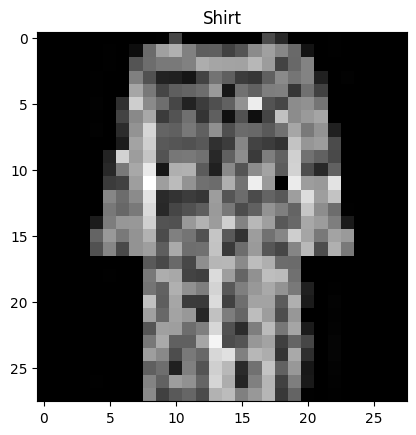

In [49]:
plt.imshow(test_samples[5].squeeze(),cmap="gray")
plt.title(classes[test_labels[5]])

In [50]:
pred_probs = makePredictions(model = model_3,
                             data=test_samples)
pred_probs[:2]

tensor([[1.8400e-02, 6.3191e-05, 3.0292e-02, 1.5354e-03, 8.1197e-01, 6.4956e-08,
         1.3713e-01, 8.3003e-06, 6.0316e-04, 7.5752e-07],
        [6.9642e-06, 2.3882e-06, 3.0083e-03, 6.6455e-08, 9.9099e-01, 3.5941e-08,
         5.9885e-03, 1.2907e-09, 7.4190e-06, 1.1008e-07]])

In [51]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 4, 3, 4, 8, 3, 1, 9, 1])

In [52]:
test_labels

[4, 4, 3, 6, 8, 6, 1, 9, 1]

In [53]:
class_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

<ipython-input-54-0bb159f53889>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows, cols, i+1)


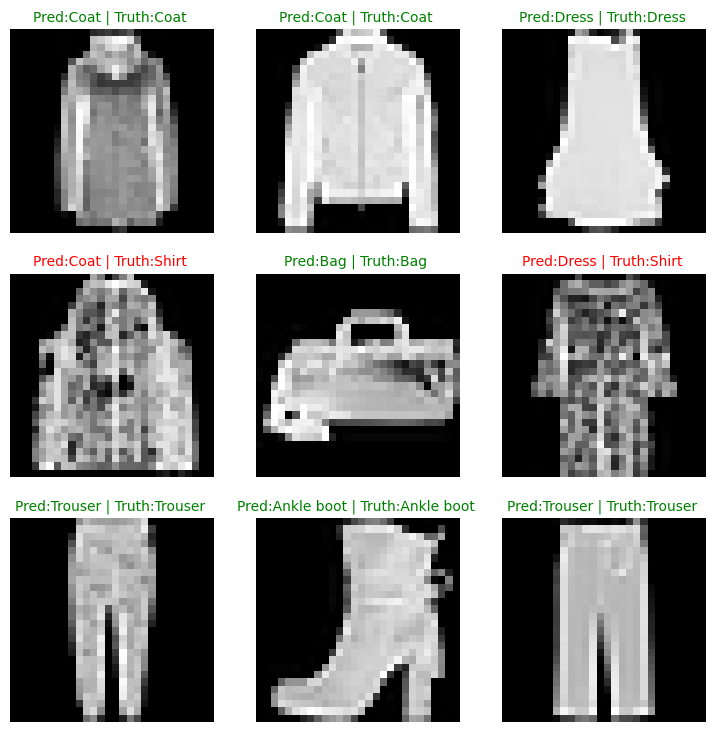

In [54]:
plt.figure(figsize=(9,9))
plt.axis(False)
rows = 3
cols = 3
for i , sample in enumerate(test_samples):
  plt.subplot(rows, cols, i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label = classes[pred_classes[i]]
  truth_label = classes[test_labels[i]]

  title_text = f"Pred:{pred_label} | Truth:{truth_label} "
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)


#Making a Confusion matrix

In [61]:
from tqdm.auto import tqdm
# make predictions
y_preds = []
model_3.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc="Making Predictions"):
    x , y = x.to(device),y.to(device)
    y_logit = model_3(x)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [62]:
len(y_pred_tensor)

10000

In [66]:
pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 27.5 MB/s eta 0:00:00


In [68]:
import torchmetrics
import mlxtend

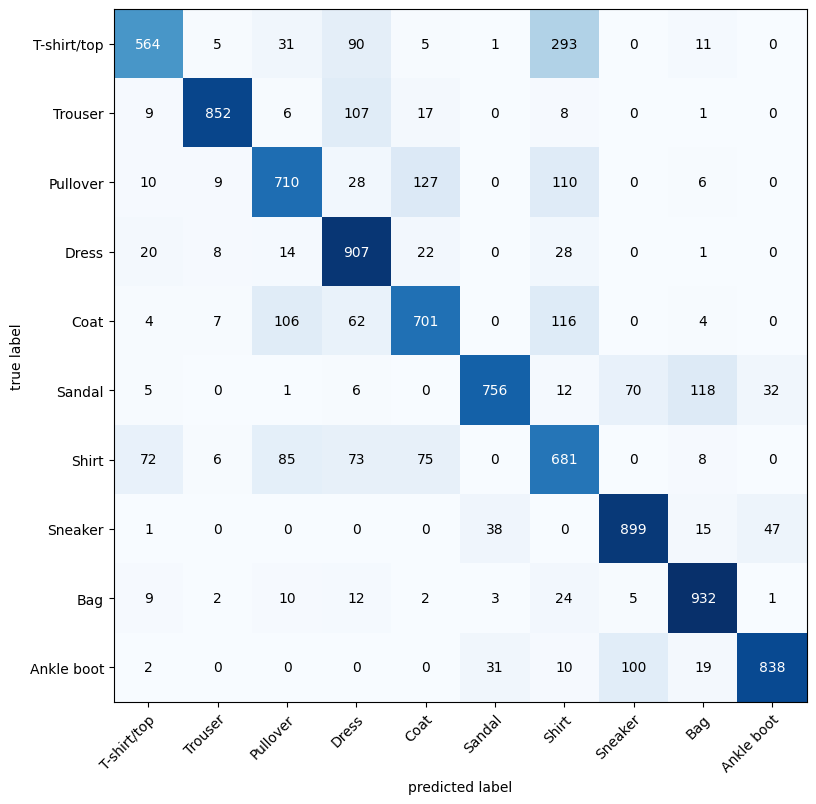

In [81]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classes),task="Multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)
fig , ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = classes,
    figsize = (9,9)
)

In [78]:
confmat_tensor

tensor([[564,   5,  31,  90,   5,   1, 293,   0,  11,   0],
        [  9, 852,   6, 107,  17,   0,   8,   0,   1,   0],
        [ 10,   9, 710,  28, 127,   0, 110,   0,   6,   0],
        [ 20,   8,  14, 907,  22,   0,  28,   0,   1,   0],
        [  4,   7, 106,  62, 701,   0, 116,   0,   4,   0],
        [  5,   0,   1,   6,   0, 756,  12,  70, 118,  32],
        [ 72,   6,  85,  73,  75,   0, 681,   0,   8,   0],
        [  1,   0,   0,   0,   0,  38,   0, 899,  15,  47],
        [  9,   2,  10,  12,   2,   3,  24,   5, 932,   1],
        [  2,   0,   0,   0,   0,  31,  10, 100,  19, 838]])

In [79]:
class_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [82]:
from pathlib import Path
MODEL_PATH = Path("Trained Models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME = "fashionMNISTCNN.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the Model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the Model to:Trained Models/fashionMNISTCNN.pth


In [87]:
load_model_3 = fasshionMnistV2(input_shape=1,
                               hidden_units=10,
                               output_shape=10)
load_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
load_model_3 = load_model_3.to(device)

<ipython-input-87-d8c433da2784>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


#Evaluating Loaded Model

In [88]:
torch.manual_seed(64)
load_model_3_results = eval_model(
    model=load_model_3,
    data_loader = test_dataloader,
    loss_fx=loss_fn,
    accuracy_fn = accuracy_fn
)
load_model_3_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'fasshionMnistV2',
 'Model_loss': 0.33390405774116516,
 'Model Acc': 88.09904153354633}

In [94]:
model_3_test_results

{'Model_Name': 'fasshionMnistV2',
 'Model_loss': 0.33390405774116516,
 'Model Acc': 88.09904153354633}

In [95]:
torch.isclose(torch.tensor(model_3_test_results['Model_loss']),
              torch.tensor(load_model_3_results['Model_loss']),
              atol = 1e-08 )

tensor(True)